<a href="https://colab.research.google.com/github/AraAGlez/Analisis-reservas-hoteleras/blob/main/2da_pre_entrega_TPFinal_Gonzalez_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis de reservas hoteleras.**

## **Resumen**

Este proyecto de análisis de datos se centra en un dataframe que contiene información sobre las reservas de dos tipos de hoteles: hoteles resort y hoteles de ciudad. El conjunto de datos incluye detalles sobre la cancelación o no de las reservas, fechas de reserva y fechas de estadia, clasificación de huéspedes (adultos, niños o bebés), si se hospedan días de la semana y/o fines de semana, tipo de habitación, método de reserva, tipo de pensión, país de origen los huespedes, entre otros. Los registros son de Portugal entre 2015 y 2017.

El objetivo principal de esta presentación es analizar y comprender las tendencias y patrones en las reservas de hoteles resort y hoteles de ciudad. Nos enfocaremos en identificar las variables que influyen en la cancelación de reservas, con el fin de proporcionar información valiosa para la toma de decisiones en la industria hotelera. Además, exploraremos relaciones entre diversas variables y la cancelación de reservas, así como aspectos relacionados con el tipo de huéspedes que frecuentan cada tipo de hotel.

## **Preguntas de interés e Hipótesis**

**Diferencias en las Tasas de Cancelación:**

Pregunta: ¿Existen diferencias significativas en las tasas de cancelación entre hoteles resort y hoteles de ciudad?

Hipótesis: Sí, anticipamos que los hoteles resort podrían tener una tasa de cancelación diferente, posiblemente mayor, debido a la naturaleza vacacional de sus huéspedes y su susceptibilidad a factores externos.

**Relación entre Tiempo de Anticipación y Cancelación:**

Pregunta: ¿Cómo se relaciona el tiempo de anticipación con la cancelación de reservas?

Hipótesis: Suponemos que las reservas realizadas con mayor anticipación podrían tener tasas de cancelación más altas, ya que los planes de viaje a largo plazo son más propensos a cambios e incertidumbres.

**Factores que Influyen en la Elección del Tipo de Hotel:**

Pregunta: ¿Qué variables influyen en la elección entre un hotel resort y un hotel de ciudad?

Hipótesis: Creemos que el número de niños o bebés en la reserva podría ser un factor influyente en la elección de un hotel resort debido a las comodidades y facilidades familiares que estos hoteles suelen ofrecer.

**Factores Importantes en la Cancelación de Reservas:**

Pregunta: ¿Cuáles son los factores más relevantes que influyen en la cancelación de reservas en hoteles?

Hipótesis: Planteamos que el tiempo de anticipación, el tipo de pensión y el método de reserva estarán fuertemente relacionados con la cancelación de reservas.

**Relación entre Tipo de Pensión y Presencia de Niños o Bebés:**

Pregunta: ¿Existe alguna relación entre el tipo de pensión elegida y la presencia de niños o bebés en la reserva?

Hipótesis: Sospechamos que las reservas con niños o bebés podrían inclinarse hacia la elección de un régimen de pensión específico.

## **Dataset**

In [1]:
# Importar librerias
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpl.style.use('bmh')

### Importando dataset

In [3]:
# Importar dataset
df_hotel = pd.read_csv ('/content/drive/MyDrive/2023/Coder/Data Science/hotel_bookings..csv' , index_col= 0)

In [4]:
# Vista del dataframe
df_hotel.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
hotel,,,,,,,,,,,,,,,,,,,,,
Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df_hotel.tail()


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
hotel,,,,,,,,,,,,,,,,,,,,,
City Hotel,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
City Hotel,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
City Hotel,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
City Hotel,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
City Hotel,0,205,2017,August,35,29,2,7,2,0.0,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
# Forma del dataframe
df_hotel.shape

(119390, 31)

### Análisis de columnas

In [7]:
# Columnas del dataframe
df_hotel.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
# Tipo de dato
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, Resort Hotel to City Hotel
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  countr

In [9]:
df_hotel['reservation_status_date'] = pd.to_datetime(df_hotel['reservation_status_date'])

In [10]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, Resort Hotel to City Hotel
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     119390 non-null  int64         
 1   lead_time                       119390 non-null  int64         
 2   arrival_date_year               119390 non-null  int64         
 3   arrival_date_month              119390 non-null  object        
 4   arrival_date_week_number        119390 non-null  int64         
 5   arrival_date_day_of_month       119390 non-null  int64         
 6   stays_in_weekend_nights         119390 non-null  int64         
 7   stays_in_week_nights            119390 non-null  int64         
 8   adults                          119390 non-null  int64         
 9   children                        119386 non-null  float64       
 10  babies                          119390 non-nul

In [11]:
df_hotel.describe(include = 'object')

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,12,5,177,8,5,10,12,3,4,3
top,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [12]:
for col in df_hotel.describe(include='object'):
    print(col)
    print(df_hotel[col].unique())
    print('-'*50)

arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL

## **Limpieza de datos**


In [13]:
# Verificar valores nulos en cada columna
df_hotel.isnull().sum()

is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

In [14]:
# Cantidad de filas
len(df_hotel)


119390

In [15]:
# Mostramos la cantidad y el porcentaje de valores nulos en cada variable
df_nans = df_hotel.isnull().sum().to_frame().reset_index()
df_nans.columns = ['Variables', '#NAN']
df_nans['%'] = df_nans['#NAN'] * 100 / len(df_hotel)
print(df_nans)

                         Variables    #NAN          %
0                      is_canceled       0   0.000000
1                        lead_time       0   0.000000
2                arrival_date_year       0   0.000000
3               arrival_date_month       0   0.000000
4         arrival_date_week_number       0   0.000000
5        arrival_date_day_of_month       0   0.000000
6          stays_in_weekend_nights       0   0.000000
7             stays_in_week_nights       0   0.000000
8                           adults       0   0.000000
9                         children       4   0.003350
10                          babies       0   0.000000
11                            meal       0   0.000000
12                         country     488   0.408744
13                  market_segment       0   0.000000
14            distribution_channel       0   0.000000
15               is_repeated_guest       0   0.000000
16          previous_cancellations       0   0.000000
17  previous_bookings_not_ca

In [16]:
#  Eliminamos las columnas con datos vacios, ademas de que estas no aportan información relevante
df_hotel.drop(['company','agent'], axis=1, inplace=True )
df_hotel.dropna(inplace=True)

In [17]:
df_hotel.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [18]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [19]:
df_hotel = df_hotel[df_hotel['adr']<5000]

In [20]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


## **StoryTelling**

### **Inicio o Planteamiento:**

En el vasto panorama de la industria hotelera, donde la hospitalidad se encuentra con la planificación estratégica, nos sumergimos en un conjunto de datos que destila información clave sobre dos variantes fundamentales: los lujosos hoteles resort y los dinamicos hoteles de ciudad. Este análisis se centra en el período comprendido entre 2015 y 2017 en Portugal, desglosando datos relacionados con reservas, huéspedes y patrones de cancelación.

**La pregunta fundamental: ¿Qué revelan estos datos?**

Nos proponemos explorar más allá de los números y gráficos; nuestro objetivo es desentrañar las tendencias que influyen en la cancelación de reservas. Esto no es simplemente una mirada superficial, sino un intento profundo de entender las dinámicas que afectan a dos tipos de hoteles en diferentes contextos, con el objetivo último de ofrecer información útil para la toma de decisiones estratégicas.

¿Por qué es esto relevante?

La cancelación de reservas no es solo un dato en una tabla; representa un desafío crítico que impacta la estabilidad financiera y operativa de los hoteles. En este contexto, explorar estas variables se convierte en una herramienta esencial para la toma de decisiones en un entorno donde la anticipación y la incertidumbre son factores clave.



**Comencemos este recorrido de descubrimiento:**

Acompáñenos mientras recorremos a través de los datos, desentrañando historias sobre las decisiones de los huéspedes, las preferencias en las reservas y las complejas relaciones entre el tiempo de anticipación y las cancelaciones. Revelaremos cómo las elecciones de los viajeros se entrelazan con políticas de reserva.

Proponemos adentrarnos en la esencia misma de la industria hotelera, desglosando patrones, identificando tendencias y generando conocimientos que podrían transformar la forma en que la hospitalidad aborda el desafío de las cancelaciones de reservas.



### **Nudo: Explorando las tendencias y relaciones**

Ahora, profundizaremos en el núcleo de nuestros datos, donde los números revelarán las verdaderas historias detrás de las reservas y cancelaciones. Utilizaremos gráficos claros y concisos para ilustrar nuestras hipótesis y responder a las preguntas que hemos planteado.

**Diferencias en las Tasas de Cancelación:**

Gráfico 1: Comparación de Tasas de Cancelación
entre Hoteles Resort y Hoteles de Ciudad


<Figure size 1000x600 with 0 Axes>

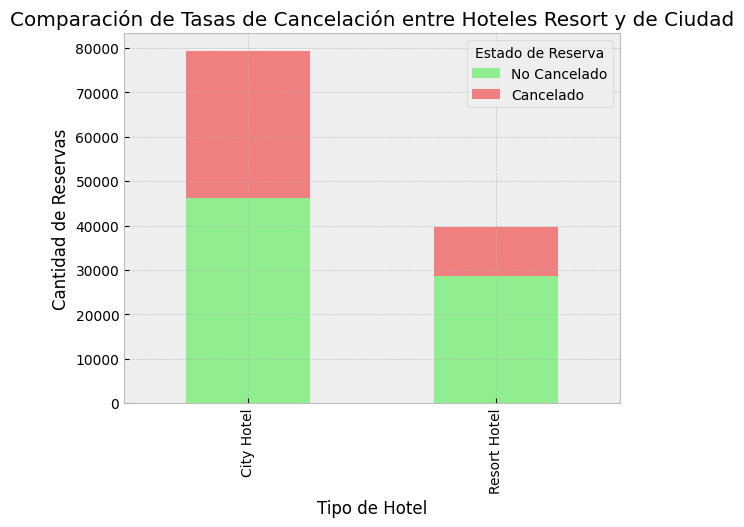

In [21]:
# Calcular el recuento de reservas canceladas y no canceladas por tipo de hotel
cancel_counts_by_hotel = df_hotel.groupby(['hotel', 'is_canceled']).size().unstack()

plt.figure(figsize=(10, 6))

# Crear un gráfico de barras apiladas
cancel_counts_by_hotel.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])

# Configurar las etiquetas y el título
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de Reservas')
plt.title('Comparación de Tasas de Cancelación entre Hoteles Resort y de Ciudad')

# Añadir leyenda
plt.legend(['No Cancelado', 'Cancelado'], title='Estado de Reserva')

# Habilitar una cuadrícula de referencia
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


In [22]:
# Calcular la proporción de cancelaciones por tipo de hotel en porcentajes
df_cancelaciones_por_hotel_porcentaje = df_hotel.groupby(['hotel', 'is_canceled']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)

# Renombrar las columnas para mayor claridad
df_cancelaciones_por_hotel_porcentaje.columns = ['No Canceladas (%)', 'Canceladas (%)']

# Mostrar las primeras filas del DataFrame resultante
df_cancelaciones_por_hotel_porcentaje.head()


,No Canceladas (%),Canceladas (%)
hotel,,
City Hotel,58.291825,41.708175
Resort Hotel,72.024952,27.975048


**Relación entre Tiempo de Anticipación y Cancelación:**

Gráfico 2: Relación entre Tiempo de Anticipación y Tasas de Cancelación

<ipython-input-23-691f2ddab140>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='lead_time', data=df_hotel, palette='Set2')


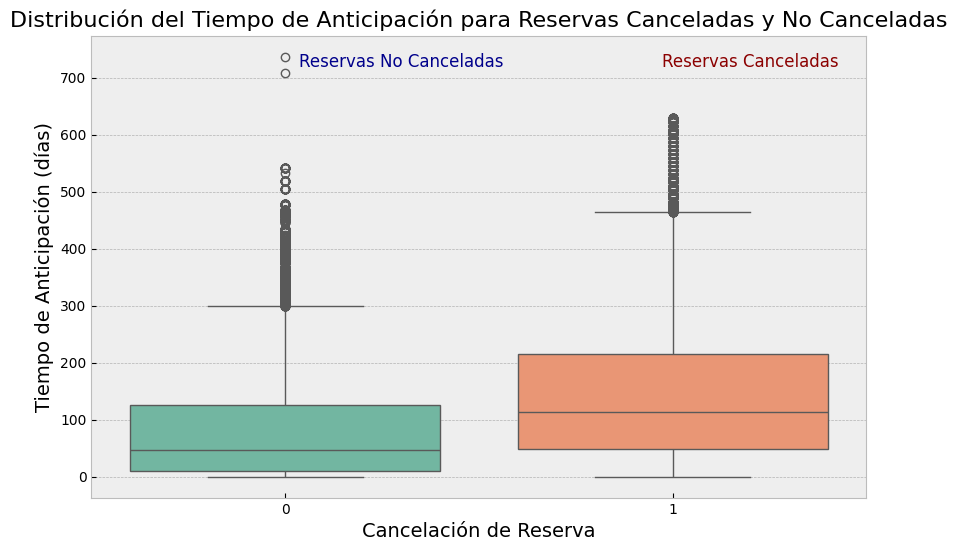

In [23]:

# Crear un gráfico de caja para comparar la distribución del tiempo de anticipación para reservas canceladas y no canceladas
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df_hotel, palette='Set2')

# Configurar las etiquetas y el título
plt.title('Distribución del Tiempo de Anticipación para Reservas Canceladas y No Canceladas', fontsize=16)
plt.xlabel('Cancelación de Reserva', fontsize=14)
plt.ylabel('Tiempo de Anticipación (días)', fontsize=14)

# Agregar comentarios
plt.text(0.3, 720, 'Reservas No Canceladas', color='darkblue', fontsize=12, ha='center')
plt.text(1.2, 720, 'Reservas Canceladas', color='darkred', fontsize=12, ha='center')

# Mostrar el gráfico
plt.show()



In [24]:
# Filtrar el DataFrame para obtener las reservas no canceladas y canceladas
reservas_no_canceladas = df_hotel[df_hotel['is_canceled'] == 0]['lead_time']
reservas_canceladas = df_hotel[df_hotel['is_canceled'] == 1]['lead_time']

# Crear un DataFrame para presentar la información en una tabla
tabla_tiempo_antelacion = pd.DataFrame({
    'Tipo de Reserva': ['No Cancelada', 'Cancelada'],
    'Media': [reservas_no_canceladas.mean(), reservas_canceladas.mean()],
    'Mediana': [reservas_no_canceladas.median(), reservas_canceladas.median()],
    'Mínimo': [reservas_no_canceladas.min(), reservas_canceladas.min()],
    'Máximo': [reservas_no_canceladas.max(), reservas_canceladas.max()],
    'Rango Interquartílico': [reservas_no_canceladas.quantile(0.75) - reservas_no_canceladas.quantile(0.25),
                              reservas_canceladas.quantile(0.75) - reservas_canceladas.quantile(0.25)]
})

# Mostrar la tabla
print(tabla_tiempo_antelacion)



  Tipo de Reserva       Media  Mediana  Mínimo  Máximo  Rango Interquartílico
0    No Cancelada   80.320209     46.0       0     737                  116.0
1       Cancelada  144.927795    113.0       0     629                  166.0


**Factores que Influyen en la Elección del Tipo de Hotel:**

Gráfico 3: Distribución de Niños/Bebés en Reservas por Tipo de Hotel

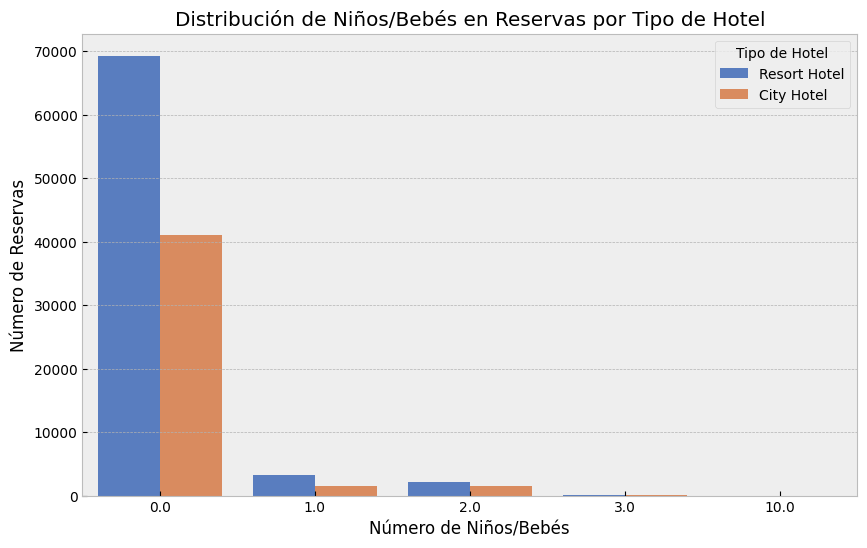

In [25]:
# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Mapear el tipo de hotel a etiquetas más descriptivas
df_hotel['hotel_label'] = df_hotel.iloc[:, 0].map({0: 'Resort Hotel', 1: 'City Hotel'})

# Crear un gráfico de barras para la distribución de Niños/Bebés por Tipo de Hotel
sns.countplot(x='children', hue='hotel_label', data=df_hotel, palette='muted')

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de Niños/Bebés en Reservas por Tipo de Hotel')
plt.xlabel('Número de Niños/Bebés')
plt.ylabel('Número de Reservas')

# Añadir la leyenda indicando el Tipo de Hotel
plt.legend(title='Tipo de Hotel')

# Mostrar el gráfico
plt.show()



In [26]:
# Calcular la distribución de Niños/Bebés por Tipo de Hotel en porcentajes
percentage_data = df_hotel.groupby(['children', df_hotel.index]).size().unstack().fillna(0) / df_hotel.groupby(df_hotel.index).size() * 100

# Mostrar la tabla
print(percentage_data)


hotel     City Hotel  Resort Hotel
children                          
0.0        93.561241     91.228912
1.0         3.812058      4.619153
2.0         2.552301      4.106475
3.0         0.074400      0.042934
10.0        0.000000      0.002526


**Factores Importantes en la Cancelación de Reservas:**

Gráfico 4: Relación entre Tiempo de Anticipación y Tipo de Pensión

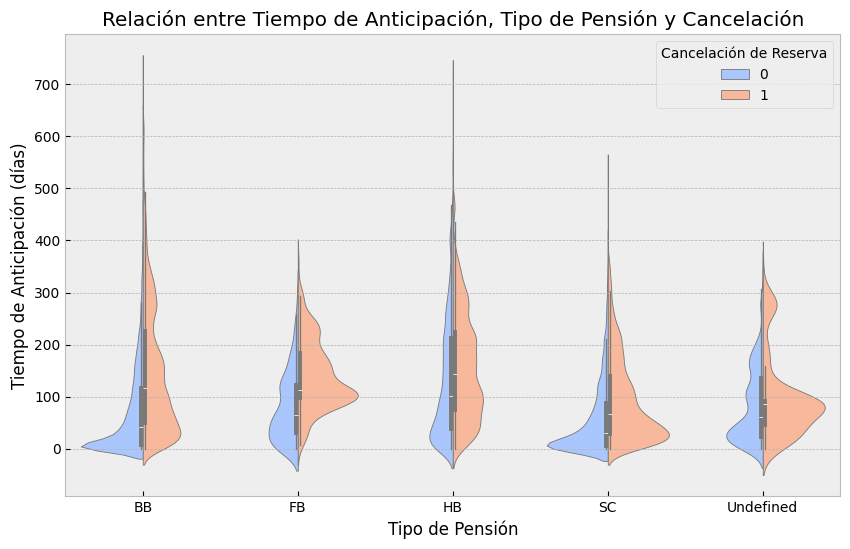

In [27]:
# Crear un gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='meal', y='lead_time', hue='is_canceled', data=df_hotel, palette='coolwarm', split=True, saturation=59.5)

# Configurar el título y las etiquetas de los ejes
plt.title('Relación entre Tiempo de Anticipación, Tipo de Pensión y Cancelación')
plt.xlabel('Tipo de Pensión')
plt.ylabel('Tiempo de Anticipación (días)')

# Añadir una leyenda fuera del gráfico para indicar la cancelación de reserva
plt.legend(title='Cancelación de Reserva', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()


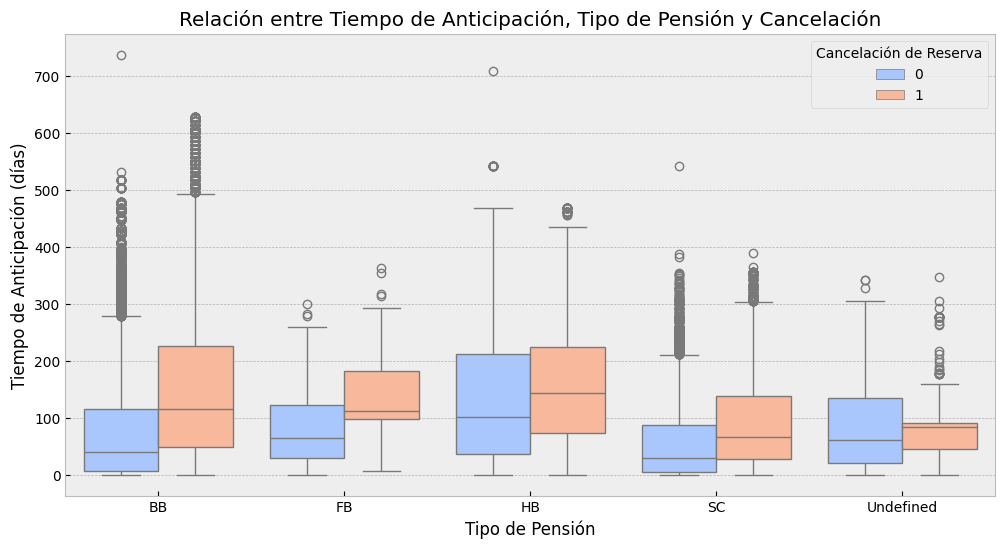

In [28]:
# Crear un gráfico de caja (boxplot) para visualizar la relación entre 'lead_time', 'meal' y 'is_canceled'
plt.figure(figsize=(12, 6))

# Utilizar seaborn para crear el boxplot
sns.boxplot(x='meal', y='lead_time', hue='is_canceled', data=df_hotel, palette='coolwarm', saturation=59.5)

# Configurar el título y las etiquetas de los ejes
plt.title('Relación entre Tiempo de Anticipación, Tipo de Pensión y Cancelación')
plt.xlabel('Tipo de Pensión')
plt.ylabel('Tiempo de Anticipación (días)')

# Añadir una leyenda fuera del gráfico para indicar la cancelación de reserva
plt.legend(title='Cancelación de Reserva', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()




In [29]:
# Crear un DataFrame con los datos de la relación entre Tiempo de Anticipación, Tipo de Pensión y Cancelación
data = df_hotel.groupby(['meal', 'lead_time', 'is_canceled']).size().unstack().fillna(0)

# Renombrar las columnas del DataFrame
data.columns = ['No Cancelado', 'Cancelado']

# Resetear el índice para que 'meal' y 'lead_time' sean columnas
data = data.reset_index()

# Mostrar la tabla
print(data)


           meal  lead_time  No Cancelado  Cancelado
0            BB          0        4962.0      353.0
1            BB          1        2584.0      266.0
2            BB          2        1524.0      162.0
3            BB          3        1339.0      148.0
4            BB          4        1234.0      144.0
...         ...        ...           ...        ...
1521  Undefined        305           0.0        1.0
1522  Undefined        306           1.0        0.0
1523  Undefined        328           1.0        0.0
1524  Undefined        342           2.0        0.0
1525  Undefined        347           0.0        1.0

[1526 rows x 4 columns]


Estos dos ultimos graficos muestran la misma información, como ya habia usado un grafico de boxplot
probé con uni de violin pero no se si sirve para este caso.

**Relación entre Tipo de Pensión Elegida y Presencia de Niños o Bebés:**

Gráfico 5: Proporción de Niños/Bebés según Tipo de Pensión


<ipython-input-30-c02700d6fc94>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='meal', y='children', data=df_hotel, palette='Set2')


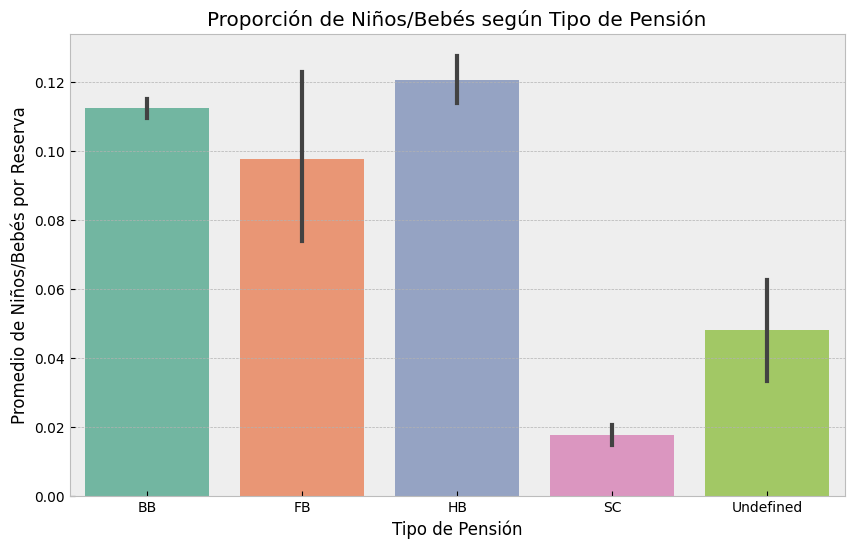

In [30]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras para visualizar la proporción de Niños/Bebés según el Tipo de Pensión
sns.barplot(x='meal', y='children', data=df_hotel, palette='Set2')

# Configurar el título y las etiquetas de los ejes
plt.title('Proporción de Niños/Bebés según Tipo de Pensión')
plt.xlabel('Tipo de Pensión')
plt.ylabel('Promedio de Niños/Bebés por Reserva')

# Mostrar el gráfico
plt.show()


<ipython-input-31-604f6342a6be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='meal', y='children', data=df_hotel, palette='Set2')


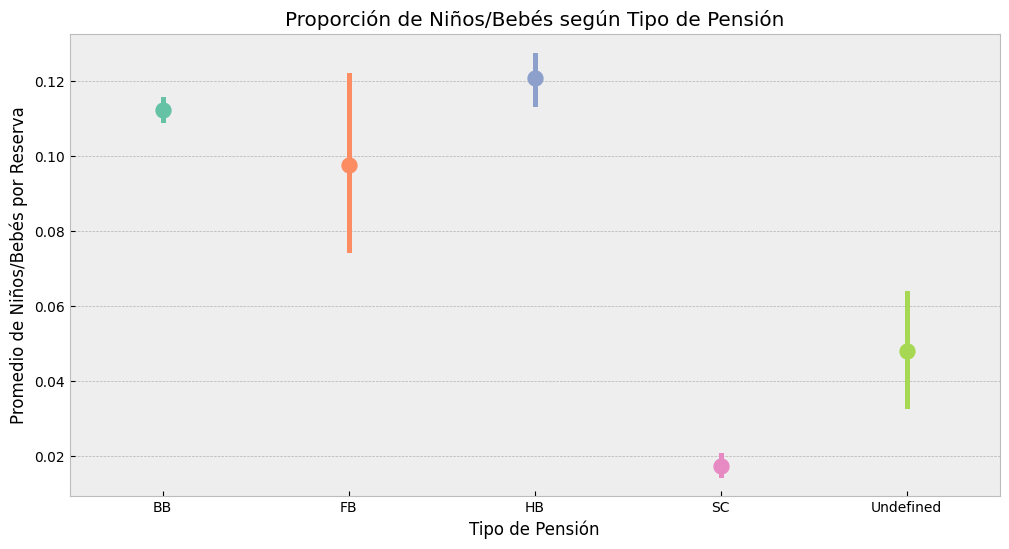

In [31]:
# Crear un gráfico de lollipop para visualizar la relación entre 'meal' y 'children'
plt.figure(figsize=(12, 6))

# Utilizar seaborn para crear el gráfico de lollipop
sns.pointplot(x='meal', y='children', data=df_hotel, palette='Set2')

# Configurar el título y las etiquetas de los ejes
plt.title('Proporción de Niños/Bebés según Tipo de Pensión')
plt.xlabel('Tipo de Pensión')
plt.ylabel('Promedio de Niños/Bebés por Reserva')

# Mostrar el gráfico
plt.show()


In [32]:
# Calcular el promedio de Niños/Bebés por Tipo de Pensión
children_by_meal = df_hotel.groupby('meal')['children'].mean().reset_index()

# Mostrar la información en forma de tabla
print(children_by_meal)


        meal  children
0         BB  0.112408
1         FB  0.097744
2         HB  0.120757
3         SC  0.017578
4  Undefined  0.048069


Estos dos ultimos graficos tambien muestran lo mismo, como ya habia utilizado de barra probé con un gráfico de
lollipop pero no estoy segura si visualmente queda bien.

### **Desenlace**

Tras explorar detalladamente las diversas facetas de nuestro conjunto de datos, hemos obtenido información valiosa que ilustran patrones y tendencias en la industria hotelera. Aquí destacamos algunos de los hallazgos claves:

**Cantidad de Cancelaciones por Tipo de Hotel:**

Al analizar la cantidad de reservas canceladas y no canceladas por tipo de hotel, observamos una diferencia significativa. Mientras que el "City Hotel" tiene un mayor número de cancelaciones (33,075) en comparación con el "Resort Hotel" (11,077), la cantidad de reservas no canceladas es más alta en el "City Hotel" (46,226) que en el " Hotel Resort" (28,519). Este contraste sugiere una dinámica única en la que los hoteles de ciudad experimentan una proporción considerable de cancelaciones en relación con sus reservas totales.

**Relación entre Tiempo de Anticipación, Tipo de Pensión y Cancelación:**

Explorando la relación entre el tiempo de anticipación, el tipo de pensión y la cancelación, identificamos que las reservas con un tiempo de anticipación más largo tienden a tener tasas de cancelación más altas. Además, ciertos tipos de pensión, como "Undefinido" y "SC", destacan por tener bajas tasas de cancelación, proporcionando información valiosa para la estrategia de gestión de reservas.

**Distribución de Niños/Bebés por Tipo de Hotel:**

La distribución de niños/bebés por tipo de hotel revela que, en general, el "Resort Hotel" atrae a más familias, ya que la cantidad de reservas con niños/bebés es más alta en comparación con el "City Hotel". Esto sugiere que las comodidades y familiares de los hoteles resort actividades son un atractivo distintivo para los huéspedes.

**Promedio de Niños/Bebés por Tipo de Pensión:**

Al analizar el promedio de niños/bebés por tipo de pensión, observamos que el tipo de pensión "HB" (Media Pensión) tiene el promedio más alto, indicando que los huéspedes que optan por este régimen son más propensos a viajar con niños/bebés. . Este dato resalta la importancia de comprender las preferencias de los huéspedes al ofrecer paquetes de pensión.

En conjunto, estos hallazgos proporcionan una visión integral de las dinámicas que influyen en la industria hotelera. Al comprender mejor las tendencias y patrones, los profesionales del sector están mejor equipados para tomar decisiones informadas que mejoren la gestión de reservas, la experiencia del huésped y la eficiencia operativa.

## **ML**


### Usando feature selected

In [33]:
# Codificar variables categóricas
categorical_cols = ['meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
numerical_cols = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
X = df_hotel[categorical_cols + numerical_cols]
y = df_hotel['is_canceled']

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X = df_hotel[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]
y = df_hotel['is_canceled']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [35]:
sfm = SelectFromModel(model, threshold=0.01)
sfm.fit(X, y)
X_selected = sfm.transform(X)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [37]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.85


In [39]:
# Otras métricas
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     14841
           1       0.85      0.72      0.78      8939

    accuracy                           0.85     23780
   macro avg       0.85      0.82      0.83     23780
weighted avg       0.85      0.85      0.84     23780



### Sin usar feature selected

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [41]:
# Paso 1: Preprocesamiento de datos

# Codificar variables categóricas
categorical_cols = ['meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
numerical_cols = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
X = df_hotel[categorical_cols + numerical_cols]
y = df_hotel['is_canceled']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [42]:
# Paso 2: Seleccionar y entrenar el modelo
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier())])

model.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['meal', 'country',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('classifier', RandomForestClassifier())])

In [43]:
# Paso 3: Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [44]:
# Otras métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14841
           1       0.88      0.80      0.84      8939

    accuracy                           0.89     23780
   macro avg       0.89      0.87      0.88     23780
weighted avg       0.89      0.89      0.88     23780



### Conclusiones

Usando el segundo resultado ya que da un accuracy de 0.89

-**Accuracy (Precisión):**
La precisión global del modelo es del 89%, lo que significa que el 89% de las predicciones son correctas. Sin embargo, la precisión sola no siempre es suficiente, especialmente si las clases están desbalanceadas.

-**Precision (Precisión por clase):**
Para la clase "No Cancelada" (0), la precisión es del 89%. Esto indica que el 89% de las reservas predichas como "No Canceladas" realmente lo son.
Para la clase "Cancelada" (1), la precisión es del 89%. Esto significa que el 89% de las reservas predichas como "Canceladas" realmente lo son.

-**Recall (Sensibilidad por clase):**
Para la clase "No Cancelada" (0), el recall es del 94%. Esto indica que el modelo identifica correctamente el 94% de las reservas que son realmente "No Canceladas".
Para la clase "Cancelada" (1), el recall es del 80%. Esto significa que el modelo identifica correctamente el 80% de las reservas que son realmente "Canceladas".

-**F1-score:**
El F1-score es una métrica que combina precisión y recall en un solo valor. Para la clase "No Cancelada", el F1-score es 0.91, y para la clase "Cancelada" es 0.84.

**Support:**

El soporte indica el número real de ocurrencias de cada clase en el conjunto de prueba. En este caso, hay 14,841 instancias de la clase "No Cancelada" y 8,939 instancias de la clase "Cancelada".


-**Apreciaciones/Conclusiones:**
La alta precisión y recall para la clase "No Cancelada" sugieren que el modelo es efectivo para identificar reservas que no serán canceladas.
El recall más bajo para la clase "Cancelada" indica que el modelo tiene más dificultades para identificar correctamente las reservas que serán canceladas. Podría ser útil explorar técnicas para manejar el desequilibrio de clases si aún no lo has hecho.
El F1-score proporciona un equilibrio entre precisión y recall. Un valor cercano a 1 indica un buen rendimiento del modelo.
Puedes considerar ajustar el umbral de decisión si deseas priorizar la mejora de la predicción para una clase específica.
